## Visualize features

To see how the network is actually learning under the hood, one useful way is to look at the activations produced by the different convolutional layers of the network. For that, we will feed an image to a pretrained VGG16 model and visualize the feature maps produced by each convolutional layers. That will give an insight of what are the different layers learning. We should expect the early layers to focus on learning simple features like edges or corners, while the last layers focusing on learning more complex patterns specific to the dataset. 

In [11]:
# Import libraries
import torch
import torch.nn as nn
from torchvision import models, transforms
from PIL import Image
import matplotlib.pyplot as plt
# import paths as p
from model import FeaturesExtractorModel

Now we define the transform of the images, consisting of a resizing and normalization to feed it later consistently to VGG16. We also plot the image that we will use in this case.

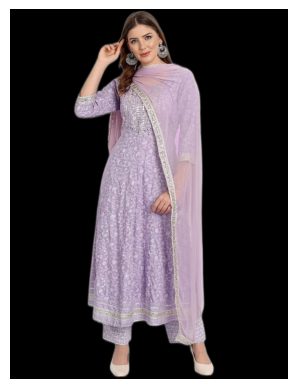

In [16]:
# Load the image
input_image = Image.open("/teamspace/studios/this_studio/ProjectIII/women_fashion_rb/anarkali suit with lavender in color with intricate white patterns throughout the fabric.jpg").convert('RGB') # add your image path
plt.imshow(input_image)
plt.axis('off')
plt.show()

The following thing to do is load the pretrained VGG16 model with ImageNet weights. We also define some variables that will be needed for storing the convolutional layers and its weights.

In [17]:
# Load a pre-trained VGG16 model
featuresExtractorModel = FeaturesExtractorModel('vgg16')

# Extract convolutional layers and their weights
conv_weights = []
conv_layers = []
total_conv_layers = 0

/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/torchvision/models/_utils.py:135: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and may be removed in the future. Please use keyword parameter(s) instead.
  warnings.warn(
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Now we iterate through the layers of the features module, identify the convolutional layers, and store them with its weights in the lists defined before

In [18]:
for module in featuresExtractorModel.model.features.children():
    if isinstance(module, nn.Conv2d):
        total_conv_layers += 1
        conv_weights.append(module.weight)
        conv_layers.append(module)
 
print(f"Total convolution layers: {total_conv_layers}")

Total convolution layers: 13


Now we extract the features map produced by each convolutional layer, to later visualize them.

In [19]:
# Set transform to be used
transform = transforms.Compose([
                transforms.Resize(256),
                transforms.CenterCrop(224),
                transforms.ToTensor(),
                transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Preprocess the image
input_image = transform(input_image)
input_image = input_image.unsqueeze(0)
 
# Extract feature maps
feature_maps = []
layer_names = []
for layer in conv_layers:
    input_image = layer(input_image)
    feature_maps.append(input_image)
    layer_names.append(str(layer))

# Process feature maps
processed_feature_maps = []
for feature_map in feature_maps:
    feature_map = feature_map.squeeze(0)  
    mean_feature_map = torch.sum(feature_map, 0) / feature_map.shape[0]
    processed_feature_maps.append(mean_feature_map.data.cpu().numpy())

Finally we plot each of the features maps and see what they look like

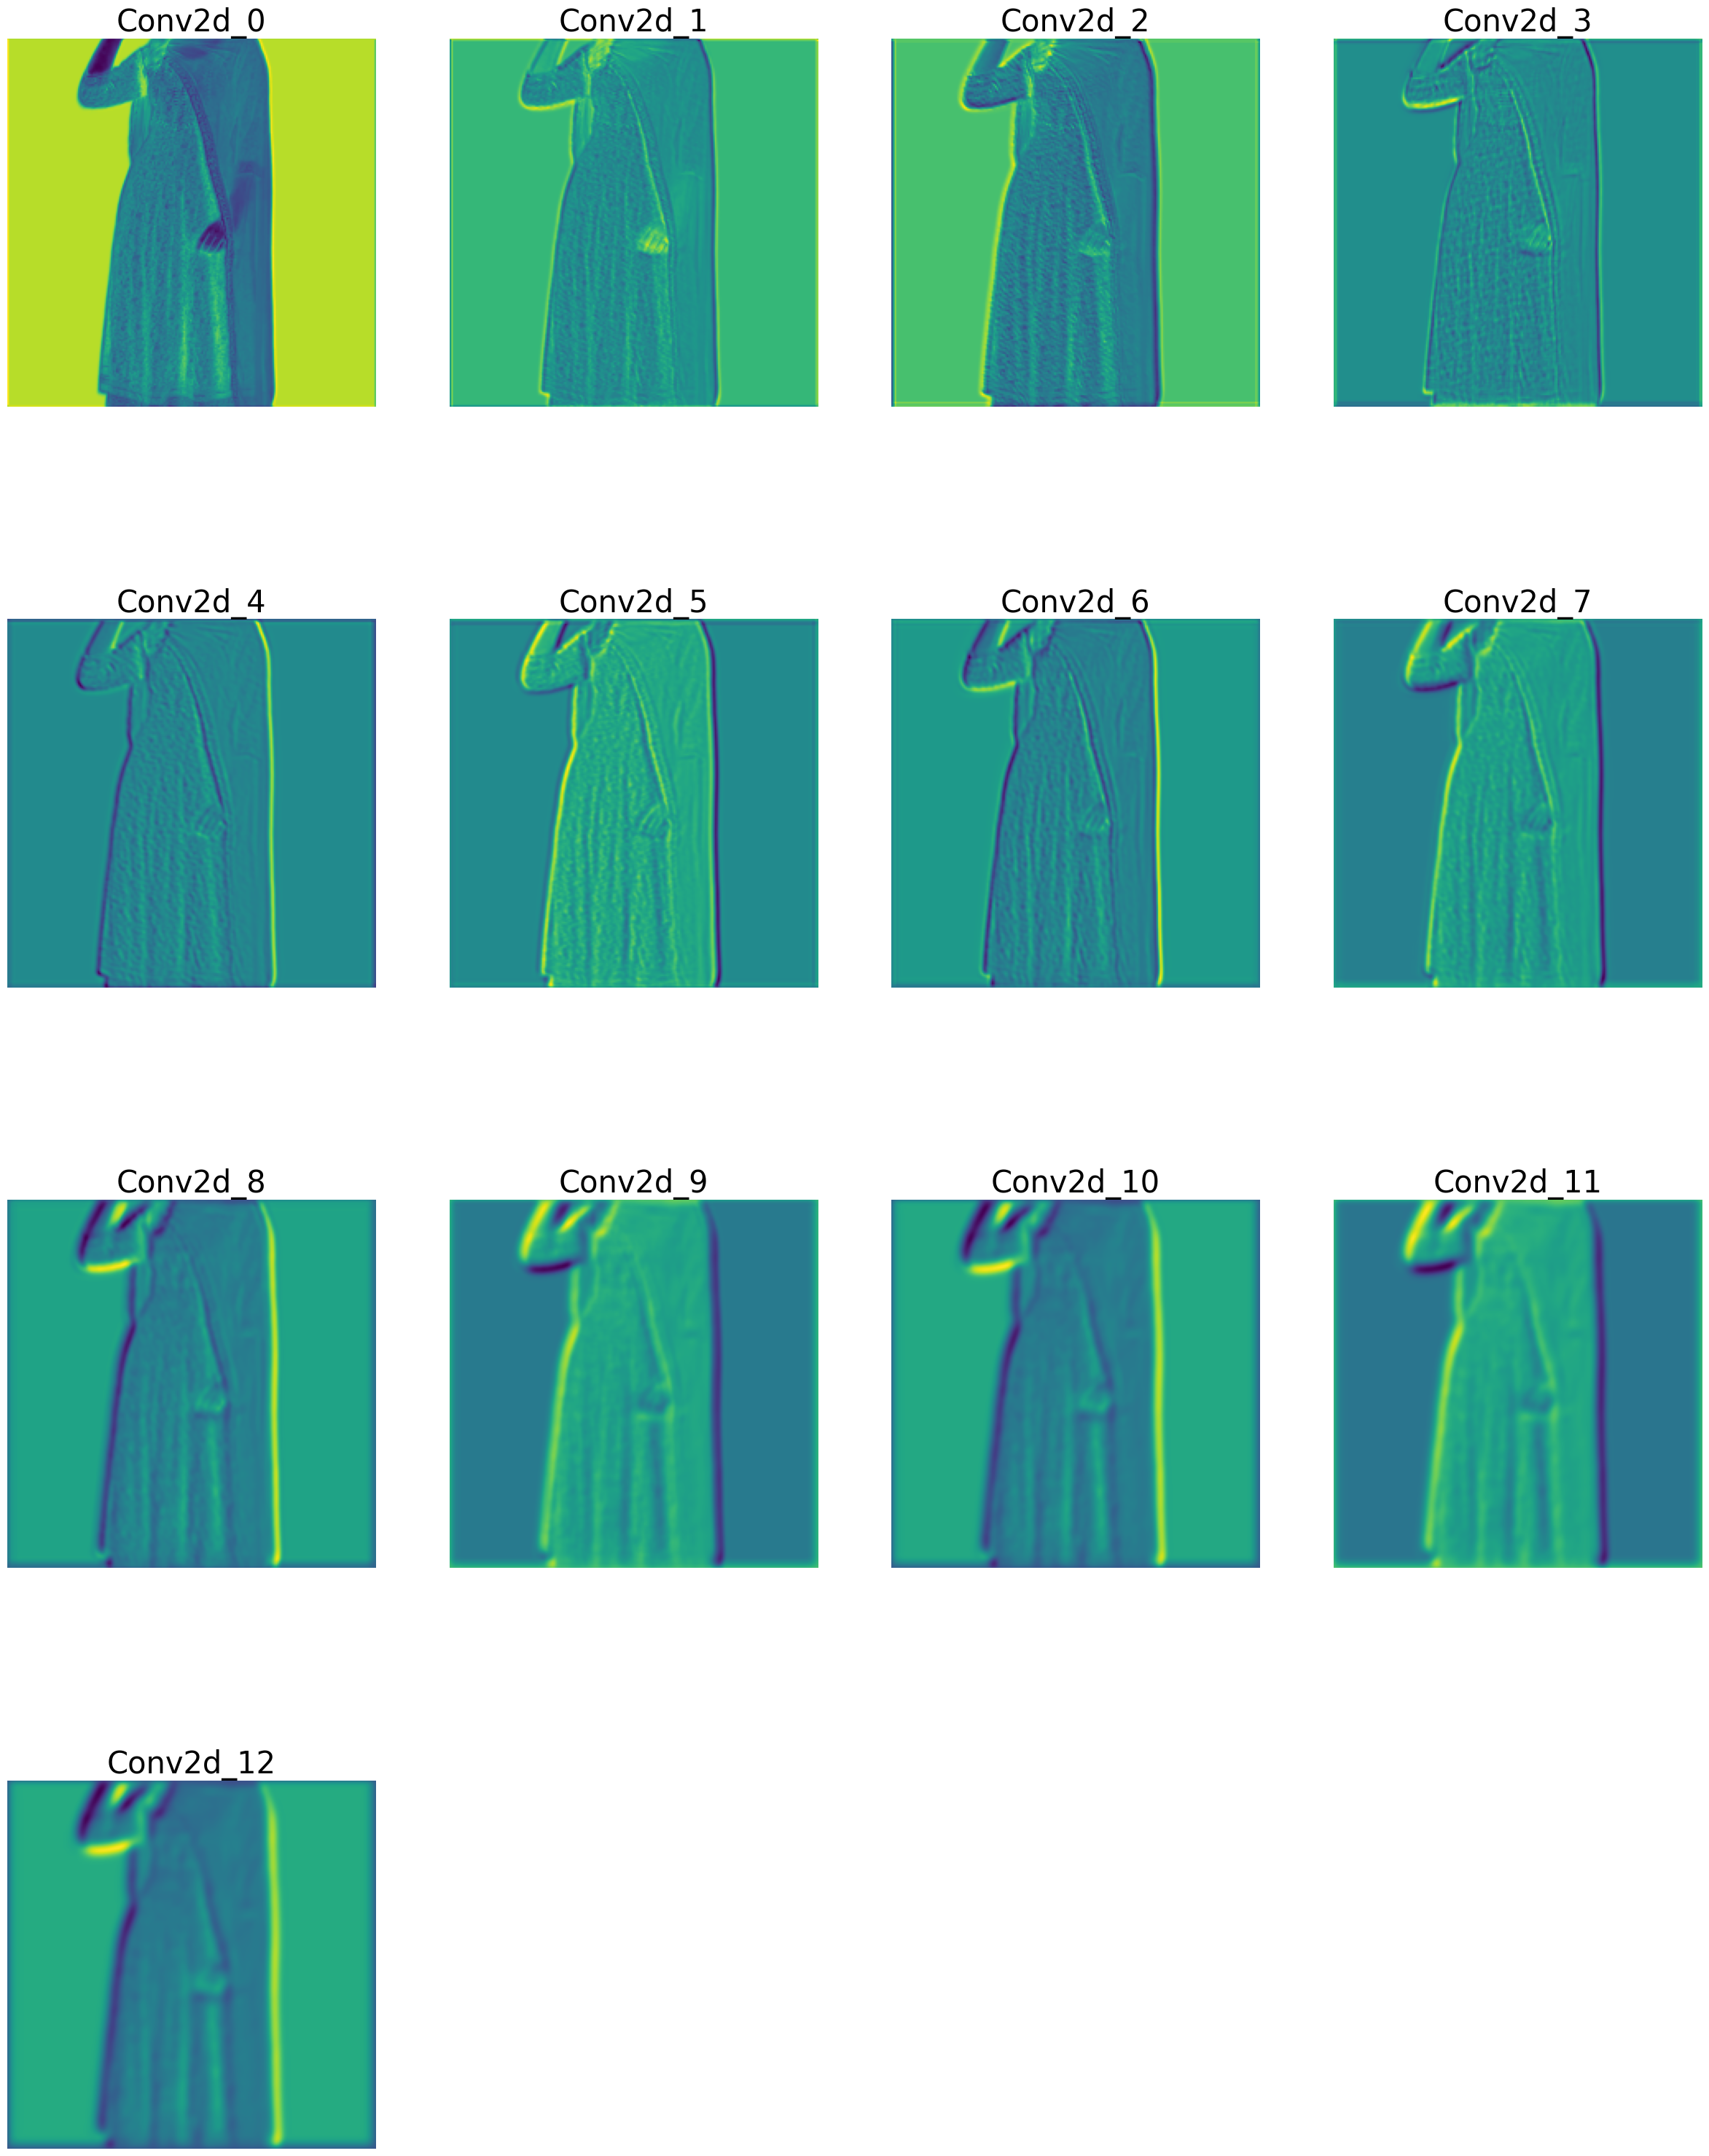

In [20]:
# Plot the feature maps
fig = plt.figure(figsize=(30, 50))
for i in range(len(processed_feature_maps)):
    ax = fig.add_subplot(5, 4, i + 1)
    ax.imshow(processed_feature_maps[i])
    ax.axis("off")
    ax.set_title(layer_names[i].split('(')[0] + '_' + str(i), fontsize=30)